<a href="https://colab.research.google.com/github/pranilbasu/ML-Projects/blob/main/ML_Project_Prediction_of_Energy_Output_of_Power_Plant.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prediction of Energy Output

In [ ]:
# importing libraries
import numpy as np
import pandas as pd
import tensorflow as tf

In [ ]:
dataset = pd.read_excel('Folds5x2_pp.xlsx')
X = dataset.iloc[:, :-1].values # matrix of features
Y = dataset.iloc[:, -1].values  # dependent variables

In [ ]:
dataset.head()  

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


#### Abbreviations :
###### AT - Ambient Temperature (in degree Celcius)
###### AP - Ambient Pressure (in milibar)
###### V - Exhaust Vaccum (in cm Hg)
###### RH - Relative Humidity (in %)
###### PE - Hourly Energy Output (in MW)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

### Building ANN 

In [ ]:
ann = tf.keras.models.Sequential()   #initializing ANN

In [ ]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))   # adding the input layer and first hidden layer

In [ ]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))   # adding the second hidden layer

In [ ]:
ann.add(tf.keras.layers.Dense(units=1))  # output layer

In [ ]:
ann.compile(optimizer = 'adam', loss = 'mean_squared_error')  # compiling the ANN

In [ ]:
ann.fit(X_train, Y_train, batch_size = 32, epochs = 100)  # training the ANN

Epoch 1/100
225/225 [==============================] - 0s 2ms/step - loss: 11136.5195
Epoch 2/100
225/225 [==============================] - 0s 2ms/step - loss: 539.2022
Epoch 3/100
225/225 [==============================] - 0s 2ms/step - loss: 507.0764
Epoch 4/100
225/225 [==============================] - 0s 2ms/step - loss: 468.9082
Epoch 5/100
225/225 [==============================] - 0s 2ms/step - loss: 426.6269
Epoch 6/100
225/225 [==============================] - 0s 2ms/step - loss: 382.0860
Epoch 7/100
225/225 [==============================] - 0s 2ms/step - loss: 336.2481
Epoch 8/100
225/225 [==============================] - 0s 2ms/step - loss: 292.2154
Epoch 9/100
225/225 [==============================] - 0s 2ms/step - loss: 249.2684
Epoch 10/100
225/225 [==============================] - 0s 2ms/step - loss: 209.0123
Epoch 11/100
225/225 [==============================] - 0s 2ms/step - loss: 172.0010
Epoch 12/100
225/225 [==============================] - 0s 2ms/step - lo

#### Predicting the results of test set

In [ ]:
Y_pred = ann.predict(X_test)
print(Y_pred)

[[431.0575 ]
 [462.10336]
 [465.59763]
 ...
 [472.04056]
 [476.26263]
 [440.6898 ]]


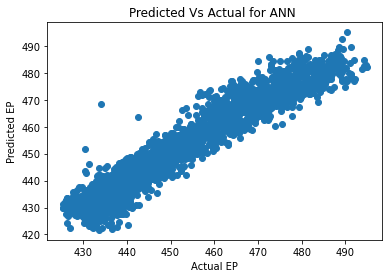

In [ ]:
import matplotlib.pyplot as plt
# visualization of the difference between the actual and predicted EP values for ANN Regression
plt.scatter(Y_test, Y_pred)
plt.xlabel("Actual EP")
plt.ylabel("Predicted EP")
plt.title("Predicted Vs Actual for ANN ")
plt.show()

### Testing the Model

In [ ]:
from sklearn import metrics
metrics.r2_score(Y_test, Y_pred)*100

91.49343459612585